In [ ]:
[](#)

## Importing Libraries

In [155]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv('baseball_nfl_stats', index_col = 0)

In [93]:
df.head()

,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,thumbnail,thumbnail_height,thumbnail_width,title,ups,url,user_reports,visited,whitelist_status,wls
0,False,BaseballBot,NaN,NaN,umpire,"[{'e': 'text', 't': 'Umpire'}]",NaN,Umpire,dark,richtext,...,self,NaN,NaN,No Stupid Questions Thread,22,https://www.reddit.com/r/baseball/comments/b8m...,[],False,all_ads,6
1,False,lemcoe9,NaN,NaN,atl,"[{'e': 'text', 't': 'Atlanta Braves'}]",NaN,Atlanta Braves,dark,richtext,...,self,NaN,NaN,r/baseball Players of the Week - Spring Traini...,42,https://www.reddit.com/r/baseball/comments/b8i...,[],False,all_ads,6
2,False,twistedlogicx,NaN,NaN,tor,"[{'e': 'text', 't': 'Toronto Blue Jays '}, {'a...",86a76246-f88a-11e5-870f-0ece25c6a7a5,Toronto Blue Jays :tor1:,dark,richtext,...,https://b.thumbs.redditmedia.com/TgX0i1Ke99KPB...,140.0,140.0,[Passan] BREAKING: Outfielder Ronald Acuña and...,2377,https://twitter.com/JeffPassan/status/11131148...,[],False,all_ads,6
3,False,datdudebdub,NaN,NaN,cin-2,"[{'e': 'text', 't': 'Cincinnati Reds'}]",NaN,Cincinnati Reds,dark,richtext,...,self,NaN,NaN,On Opening Day the Reds set a GABP attendance ...,718,https://www.reddit.com/r/baseball/comments/b8k...,[],False,all_ads,6
4,False,RebeeMo,NaN,NaN,tor-1,"[{'e': 'text', 't': 'Toronto Blue Jays'}]",NaN,Toronto Blue Jays,dark,richtext,...,https://b.thumbs.redditmedia.com/IM_kAtMGEaNEB...,140.0,140.0,"@BlueJays acquired INF Alen Hanson, RHP Derek ...",606,https://twitter.com/BlueJays/status/1113107132...,[],False,all_ads,6


In [94]:
#checking that everything pulled in correctly
df.columns

Index(['archived', 'author', 'author_cakeday', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'can_gild', 'can_mod_post', 'clicked',
       'contest_mode', 'created', 'created_utc', 'crosspost_parent',
       'crosspost_parent_list', 'distinguished', 'domain', 'downs', 'edited',
       'gilded', 'gildings', 'hidden', 'hide_score', 'id', 'is_crosspostable',
       'is_meta', 'is_original_content', 'is_reddit_media_domain',
       'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_metadata', 'media_only', 'mod_reports', 'name',
       'no_follow', 'num_comments

In [95]:
df['subreddit'].value_counts()

baseball    917
nfl         898
Name: subreddit, dtype: int64

In [96]:
df['title'].head()

0                           No Stupid Questions Thread
1    r/baseball Players of the Week - Spring Traini...
2    [Passan] BREAKING: Outfielder Ronald Acuña and...
3    On Opening Day the Reds set a GABP attendance ...
4    @BlueJays acquired INF Alen Hanson, RHP Derek ...
Name: title, dtype: object

#### baseball dummy column but i don't like using pd.get_dummies

In [97]:
df['is_baseball'] = df['subreddit'].map(lambda x: 1 if x == 'baseball' else 0)

In [98]:
df['is_baseball'].value_counts()

1    917
0    898
Name: is_baseball, dtype: int64

# Fitting and scoring

In [99]:
cvec = CountVectorizer(stop_words='english')

In [100]:
X = df[['title']]
y = df['is_baseball']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [101]:
X_train.shape

(1361, 1)

In [102]:
X_test.shape

(454, 1)

In [103]:
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train['title']).todense(), columns=cvec.get_feature_names())

X_test_cvec = cvec.transform(X_test['title'])

In [104]:
X_train_cvec.head()

,000,002,01,03,04,05,07,0bb,0er,0r,...,yr,yusei,zach,zack,zimmer,zimmermann,zips,zolecki,zone,zrebiec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Multinomial naive bayes, fit and score

In [105]:

nb = MultinomialNB()

In [106]:
params = {'alpha': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]}

In [107]:
grid = GridSearchCV(nb, param_grid=params, cv = 5)

In [108]:
grid.fit(X_train_cvec, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
nb_best = MultinomialNB(alpha=.5)

In [110]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.5}
0.9316678912564291


In [111]:
nb_best.fit(X_train_cvec, y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [112]:
print(f' NB train score is {nb_best.score(X_train_cvec, y_train)}')
print(f' NB test score is {nb_best.score(X_test_cvec, y_test)}')

 NB train score is 0.9897134459955915
 NB test score is 0.9317180616740088


Hey, thats pretty good

# What about Logistic regression?

In [113]:
lr = LogisticRegression()

In [114]:
lr.fit(X_train_cvec, y_train)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
print(f'Logistic train score is {lr.score(X_train_cvec, y_train)}')
print(f'Logistic test score is {lr.score(X_test_cvec, y_test)}')

Logistic train score is 0.9955914768552535
Logistic test score is 0.9074889867841409


## Some overfitting, but the model can correctly predict subreddits from titles

Would Tfid work better?

In [116]:
tfid = TfidfVectorizer(stop_words='english')
X_train_tfid = pd.DataFrame(tfid.fit_transform(X_train['title']).todense(), columns=tfid.get_feature_names())
X_test_tfid = tfid.transform(X_test['title'])

### Same Models

In [117]:
grid.fit(X_train_tfid, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.9}
0.9221160911094783


In [119]:
nb_best2 = MultinomialNB(alpha=.9)

In [120]:
nb_best2.fit(X_train_tfid, y_train)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [121]:
print(f' NB tfid train score is {nb_best2.score(X_train_tfid, y_train)}')
print(f' NB tfid test score is {nb_best2.score(X_test_tfid, y_test)}')

 NB tfid train score is 0.9904481998530492
 NB tfid test score is 0.9273127753303965


In [122]:
lr.fit(X_train_tfid, y_train)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
print(f' Logistic tfid train score is {lr.score(X_train_tfid, y_train)}')
print(f' Logistic tfid test score is {lr.score(X_test_tfid, y_test)}')

 Logistic tfid train score is 0.9897134459955915
 Logistic tfid test score is 0.9185022026431718


Tfid appears to be slightly worse to roughly the same

# But titles only tell so much.  Did you know about flair on reddit?

Reddit users can flair themselves or their post on a per subreddit basis.  Sports subreddits are perfect to test this out, since most fans want to distinguish themselves with their favorite team.

In [124]:
df['author_flair_text'].head()

0                      Umpire
1              Atlanta Braves
2    Toronto Blue Jays :tor1:
3             Cincinnati Reds
4           Toronto Blue Jays
Name: author_flair_text, dtype: object

you may notice in index 2 that the Blue Jays has a 'tor1' after the flair, due to the presence of alternate logos available on /r/baseball

In [125]:
df['author_flair_text'].isnull().sum()

318

Of course, not everyone flairs themselves.  

In [126]:
df2 = df

In [127]:
df2['author_flair_text'].isnull().sum()

318

In [128]:
df2 = df2[df2['author_flair_text'].notnull()]

In [129]:
df2.shape

(1497, 87)

In [130]:
df2['is_baseball'].value_counts(normalize = True)

1    0.50501
0    0.49499
Name: is_baseball, dtype: float64

I'm actually stunned that the rate of flaired users is roughly the same across both subreddits, percentage of baseball to nfl did not significantly change

In [131]:
X2 = df2[['author_flair_text']]
y2 = df2['is_baseball']

Using the same transformers and models as before

In [132]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify = y2, random_state = 42)

In [133]:
X2_train_cvec = pd.DataFrame(cvec.fit_transform(X2_train['author_flair_text']).todense(), columns=cvec.get_feature_names())
X2_test_cvec = cvec.transform(X2_test['author_flair_text'])

In [134]:
grid.fit(X2_train_cvec, y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [135]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.1}
0.9955436720142602


In [136]:
nb_best3 = MultinomialNB(alpha=.1)

In [137]:
nb_best3.fit(X2_train_cvec, y2_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [138]:
nb_best3.score(X2_train_cvec, y2_train)

1.0

In [139]:
nb_best3.score(X2_test_cvec, y2_test)

1.0

# Oh.  That's a bit concerning

In [140]:
lr.fit(X2_train_cvec, y2_train)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
lr.score(X2_train_cvec, y2_train)

1.0

In [142]:
lr.score(X2_test_cvec, y2_test)

0.9973333333333333

# Maybe not?  Maybe it's better to sort the subreddits by the flair text of the authors rather than the titles?

In [143]:
X2_train_tfid = pd.DataFrame(tfid.fit_transform(X2_train['author_flair_text']).todense(), columns=tfid.get_feature_names())
X2_test_tfid = tfid.transform(X2_test['author_flair_text'])

In [144]:
grid.fit(X2_train_tfid, y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [145]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.1}
0.9964349376114082


In [146]:
nb_best4 = MultinomialNB(alpha = .1)

In [147]:
nb_best4.fit(X2_train_tfid, y2_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [148]:
nb_best4.score(X2_train_tfid, y2_train)

1.0

In [149]:
nb_best4.score(X2_test_tfid, y2_test)

1.0

In [150]:
lr.fit(X2_train_tfid, y2_train)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
lr.score(X2_train_tfid, y2_train)

1.0

In [152]:
lr.score(X2_test_tfid, y2_test)

1.0

#### How does tree work on the model?

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
dtc = DecisionTreeClassifier(random_state=42)
params_dtc = ({'max_depth':list(range(1, 50)),
                                  'min_samples_split':[5, 10, 15, 20],
                                  'min_samples_leaf':[2, 3, 4, 5, 6, 7]})

In [204]:
grid_dtc = GridSearchCV(dtc, param_grid=params_dtc, cv = 5)

In [205]:
grid_dtc.fit(X2_train_cvec, y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_split': [5, 10, 15, 20], 'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [206]:
grid_dtc.best_params_

{'max_depth': 33, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [288]:
dtc_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=42)

In [289]:
dtc_best.fit(X2_train_cvec, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [290]:
dtc_best.score(X2_train_cvec, y2_train)

0.624777183600713

In [291]:
dtc_best.score(X2_test_cvec, y2_test)

0.6533333333333333

# This data is all correct.  Flairs are so closely tied to their respective subreddits that they become immensely powerful in distinguishing what subreddit they come from.  Based on my data, I hypothesize that they're powerful enough to distinguish posts between ANY 2 subreddits, and they could possibly work is large datasets of hundreds of subreddits

## From here I will be (attempting to) generate visuals

## Decision Tree

Thanks to this go to the honorable Jacob Kohler and this medium link:

https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [292]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [293]:
dot_data = StringIO()

In [294]:
export_graphviz(dtc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [295]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

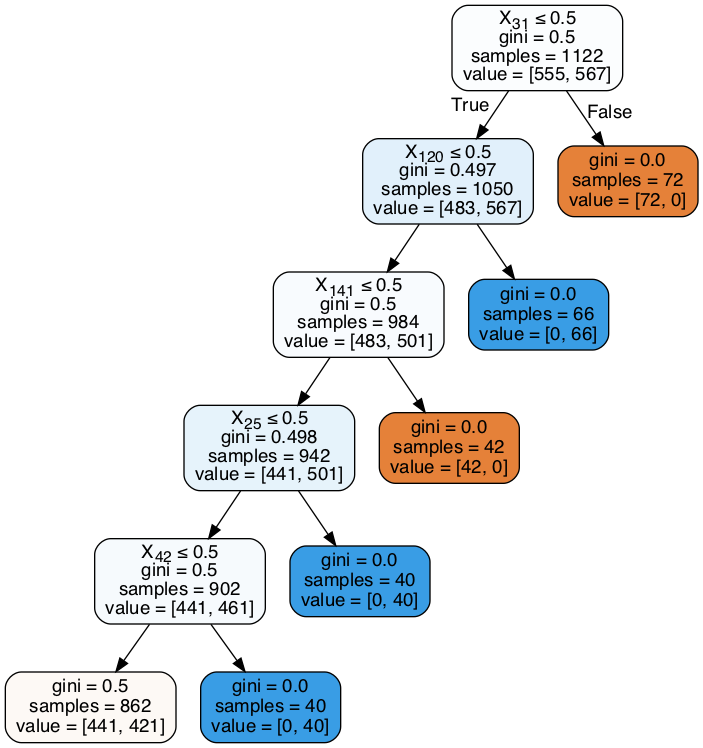

In [296]:
Image(graph.create_png())

In [297]:
for i in [31, 120, 141, 25, 42]:
    print(X2_train_cvec.columns[i])

broncos
new
patriots
blue
chicago


## Wordclouds!
Big thanks to this link for showing me how its done https://www.datacamp.com/community/tutorials/wordcloud-python

In [268]:
text = " ".join(review for review in df2.author_flair_text)

In [269]:
stopwords = set(STOPWORDS)

In [281]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


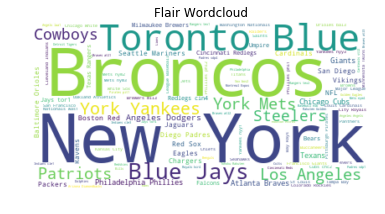

In [287]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Flair Wordcloud')
plt.show();

In [283]:
text2 = ''.join(review for review in df.title)

In [284]:
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

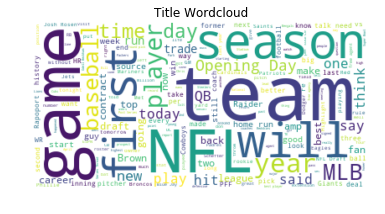

In [286]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Title Wordcloud')
plt.show();